# Airline Company Satisfaction Random Forest

## **Step 1: Imports** 


In [34]:
import pandas as pd
import numpy as np
import pickle
import sklearn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import sklearn.metrics as metrics

In [2]:
air_data = pd.read_csv("Invistico_Airline.csv")

## **Step 2: Data cleaning** 

To get a sense of the data, display the first 10 rows.

In [3]:
# Display first 10 rows.
air_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Now, display the variable names and their data types. 

In [4]:
# Display variable names and types.
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

We observe that satisfaction, Customer Type, Type of Travel and Class columns are categorical while other variables are numeric.

Next, to understand the size of the dataset, identify the number of rows and the number of columns.

In [5]:
# Identify the number of rows and the number of columns.
air_data.shape

(129880, 22)

Now, check for missing values in the rows of the data.

In [6]:
# Get the number of rows that contain missing values.
air_data.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

There are 393 missing values in the column "Arrival Delay in Minutes".

Drop the rows with missing values. Then, save the resulting pandas DataFrame in a variable named `air_data_subset`.

In [7]:
# Drop missing values.
# Save the DataFrame in variable `air_data_subset`.
air_data_subset=air_data.dropna(axis=0)
air_data_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

Next, display the first 10 rows to examine the data subset.

In [8]:
# Display the first 10 rows.
air_data_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Confirm that it does not contain any missing values.

In [9]:
# Count of missing values.
air_data_subset.isna().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

Next, convert the categorical features to indicator (one-hot encoded) features. In order to use random forest model in machine learning, it is important to transform all of the variables (both predictor and target values) into numeric.

The target variable, `satisfaction`, does not need to be encoded and will be extracted in a later step.

In [10]:
# Convert categorical features to one-hot encoded features.
air_data_subset_dummies=pd.get_dummies(air_data_subset, columns=["Customer Type", "Type of Travel", "Class"])
air_data_subset_dummies

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,65,265,0,0,0,2,2,4,2,...,2,0,0.0,1,0,0,1,0,1,0
1,satisfied,47,2464,0,0,0,3,0,2,2,...,2,310,305.0,1,0,0,1,1,0,0
2,satisfied,15,2138,0,0,0,3,2,0,2,...,2,0,0.0,1,0,0,1,0,1,0
3,satisfied,60,623,0,0,0,3,3,4,3,...,3,0,0.0,1,0,0,1,0,1,0
4,satisfied,70,354,0,0,0,3,4,3,4,...,5,0,0.0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,29,1731,5,5,5,3,2,5,2,...,2,0,0.0,0,1,0,1,0,1,0
129876,dissatisfied,63,2087,2,3,2,4,2,1,1,...,1,174,172.0,0,1,0,1,1,0,0
129877,dissatisfied,69,2320,3,0,3,3,3,2,2,...,2,155,163.0,0,1,0,1,0,1,0
129878,dissatisfied,66,2450,3,2,3,2,3,2,2,...,2,193,205.0,0,1,0,1,0,1,0


Turning categorical variable into numeric varible is necessary because the sklearn implementation of RandomForestClassifier() requires that categorical features be encoded to numeric, which can be done using dummy variables or one-hot encoding.

Next, display the first 10 rows to review the `air_data_subset_dummies`. 

In [11]:
# Display the first 10 rows.
air_data_subset_dummies.head(10)

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,65,265,0,0,0,2,2,4,2,...,2,0,0.0,1,0,0,1,0,1,0
1,satisfied,47,2464,0,0,0,3,0,2,2,...,2,310,305.0,1,0,0,1,1,0,0
2,satisfied,15,2138,0,0,0,3,2,0,2,...,2,0,0.0,1,0,0,1,0,1,0
3,satisfied,60,623,0,0,0,3,3,4,3,...,3,0,0.0,1,0,0,1,0,1,0
4,satisfied,70,354,0,0,0,3,4,3,4,...,5,0,0.0,1,0,0,1,0,1,0
5,satisfied,30,1894,0,0,0,3,2,0,2,...,2,0,0.0,1,0,0,1,0,1,0
6,satisfied,66,227,0,0,0,3,2,5,5,...,3,17,15.0,1,0,0,1,0,1,0
7,satisfied,10,1812,0,0,0,3,2,0,2,...,2,0,0.0,1,0,0,1,0,1,0
8,satisfied,56,73,0,0,0,3,5,3,5,...,4,0,0.0,1,0,0,1,1,0,0
9,satisfied,22,1556,0,0,0,3,2,0,2,...,2,30,26.0,1,0,0,1,0,1,0


Then, check the variables of air_data_subset_dummies.

In [12]:
# Display variables.
air_data_subset_dummies.dtypes

satisfaction                          object
Age                                    int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_Loyal Customer           uint8
Customer Type_disloyal Customer        uint8
Type of Travel_Business travel         uint8
Type of Tr

All of the variables with the relevant column name, are converted into uint8 data type.

## **Step 3: Model building** 

The first step to building the model is separating the labels (y) from the features (X).

In [13]:
# Separate the dataset into labels (y) and features (X).
X= air_data_subset_dummies.drop("satisfaction", axis=1)
y=pd.DataFrame(air_data_subset["satisfaction"].replace({"dissatisfied":1, "satisfied":0}))

Since target variable should be one column data frame, it would be better to use replace with a map of numeric values, instead of using get_dummies, since the latter turns the categoric variables into more than one columns.

Once separated, split the data into train, validate, and test sets. 

In [14]:
# Separate into train, validate, test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=42)

### Tune the model

Now, we shall fit and tune a random forest model with separate validation set. We shall begin by determining a set of hyperparameters for tuning the model using GridSearchCV.


In [15]:
# Determine set of hyperparameters.
cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }

Next, create a list of split indices.

In [16]:
# Create list of split indices.
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split=PredefinedSplit(split_index)

Now, instantiate the model.

In [17]:
# Instantiate model.
rf=RandomForestClassifier(random_state=0)
scoring = {'accuracy', 'precision', 'recall', 'f1'}

Next, use GridSearchCV to search over the specified parameters.

In [18]:
# Search over specified parameters.
rf_val = GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, refit='f1', verbose=1)

Now, fit the model.

In [19]:
# Fit the model.
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 180 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 11.0min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weig...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, ra

Finally, obtaining the optimal parameters.

In [20]:
# Obtain optimal parameters.
rf_val.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'n_estimators': 150}

## **Step 4: Results and evaluation** 

Use the selected model to predict on the test data. Use the optimal parameters found via GridSearchCV.

In [21]:
# Use optimal parameters on GridSearchCV.
rf_opt=RandomForestClassifier(max_depth= None, max_features= 4, min_samples_leaf= 1, n_estimators= 125, random_state=0)

Once again, fit the optimal model.

In [22]:
# Fit the optimal model.
rf_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

And predict on the test set using the optimal model.

In [23]:
# Predict on test set.
y_pred=rf_opt.predict(X_test)

### Obtain performance scores

Calculate the scores: precision score, recall score, accuracy score, F1 score.

In [24]:
# Precision score on test data set.
pc_test=precision_score(y_test, y_pred)
print("Precision score is " + str(round(pc_test,2)))

Precision score is 0.94


In [25]:
# Recall score on test data set.
rc_test=recall_score(y_test, y_pred)
print("Recall score is " + str(round(rc_test,2)))

Recall score is 0.96


In [26]:
# Accuracy score on test data set.
ac_test=accuracy_score(y_test, y_pred)
print("Accuracy score is " + str(round(ac_test, 2)))

Accuracy score is 0.95


In [27]:
# F1 score on test data set.
f1_test=f1_score(y_test, y_pred)
print("F1 score is " + str(round(f1_test, 2)))

F1 score is 0.95


The model performs well according to all 4 performance metrics. The model's recall score is slightly better than the 3 other metrics.

### Produce a confusion matrix

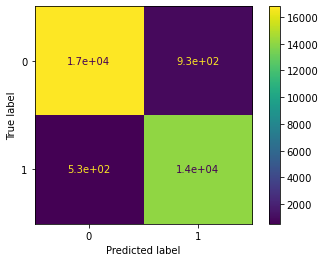

In [31]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=rf_opt.classes_)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_opt.classes_)
disp.plot()

### Evaluate the model

Finally, create a table of results to evaluate the performace of the model.

In [32]:
# Create table of results.
table=pd.DataFrame()

table = table.append({'Model': "Tuned Random Forest",
                        'F1':  f1_test,
                        'Recall': rc_test,
                        'Precision': pc_test,
                        'Accuracy': ac_test
                      },
                        ignore_index=True
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Random Forest,0.950906,0.963757,0.938393,0.954961


### Feature Importance

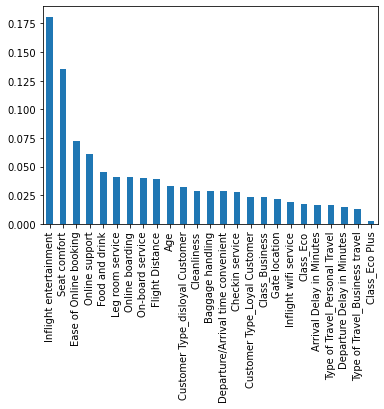

In [35]:
importances = rf_opt.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

## **Conclusions**

-	The random forest model predicted satisfaction with more than 95.4% accuracy. The precision is over 93.8% and the recall is approximately 96.4%.
-	Customer satisfaction is highly tied to 'Inflight entertainment', 'Seat comfort', and 'Ease of Online booking'. Improving these experiences should lead to better customer satisfaction.